### DAT405 Assignment 1 – Group 53
#### Venkata Sai Dinesh Uddagiri - (14 hrs)
#### Madhumitha Venkatesan - (14 hrs)

# Problem 1

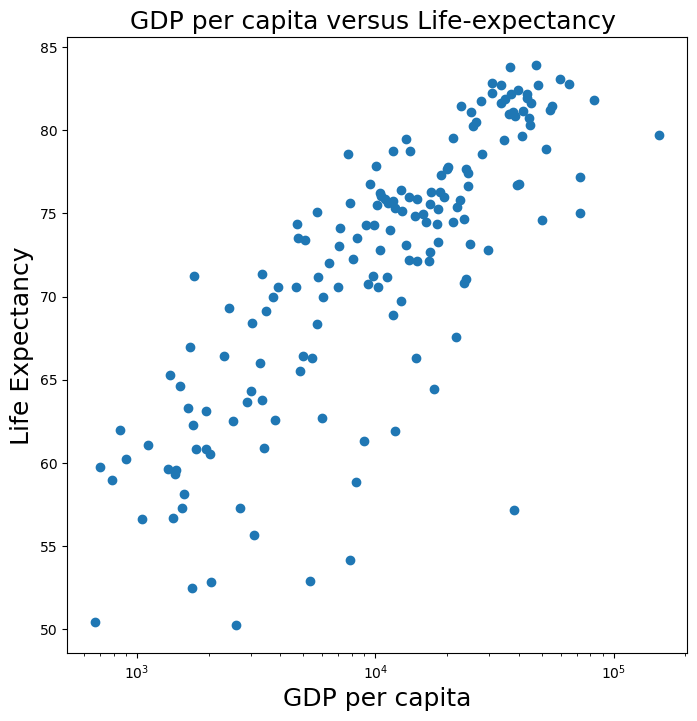

In [1]:
#code to draws a scatter plot for GDP per capita versus Life-expectancy
import pandas as pnd
import matplotlib.pyplot as plt
#Reading csv file in to data frame
le_Gdp_DF_Raw=pnd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
#Data cleaning 
#le_gdp_DF_clean = le_Gdp_DF_Raw.dropna(subset = ['Life expectancy', 'GDP per capita','Population (historical estimates)'])
le_gdp_DF_clean = (le_Gdp_DF_Raw[(le_Gdp_DF_Raw['Year'] >= 2011) & (le_Gdp_DF_Raw['Year'] <= 2019)]
                  .dropna(subset = ['Life expectancy', 'GDP per capita','Population (historical estimates)']))
del le_gdp_DF_clean["417485-annotations"], le_gdp_DF_clean["Continent"]
#Obtaining mean 'Life expectancy','GDP per capita' and 'Population (historical estimates)'of based on 'Entity'
le_gdp_DF_clean =le_gdp_DF_clean.groupby(['Entity'])[['Life expectancy','GDP per capita','Population (historical estimates)'
                                                   ]].agg('mean')
plt.figure(figsize=(8,8))
#Drawing scatter plot with corresponding axis Labels and title
plt.scatter(le_gdp_DF_clean['GDP per capita'], le_gdp_DF_clean['Life expectancy'])
plt.title("GDP per capita versus Life-expectancy ", fontsize = 18)
plt.xlabel("GDP per capita", fontsize = 18)
plt.ylabel("Life Expectancy", fontsize = 18)
plt.xscale("log")
plt.show()

In [2]:
#code to obatain data of life expectancy higher than one standard deviation above the mean
#Calculation of standard deviation for Life expectancy
StandardDeviation = le_gdp_DF_clean.describe().loc['std', 'Life expectancy']
#Calculation of mean for Life expectancy
mean = le_gdp_DF_clean.describe().loc['mean', 'Life expectancy']
#Printing mean and StandardDeviation of Life expectancy
print("Standard Deviation of Life expectancy is", StandardDeviation)
print("mean of Life expectancy is", StandardDeviation)
#calculation of life expectancy higher than one standard deviation above the mean
le_gdp_DF_clean[le_gdp_DF_clean['Life expectancy'] > mean + StandardDeviation].sort_values(by='Life expectancy', ascending = False)

Standard Deviation of Life expectancy is 8.235309996831452
mean of Life expectancy is 8.235309996831452


,Life expectancy,GDP per capita,Population (historical estimates)
Entity,,,
Hong Kong,83.912375,47422.371582,7.354659e+06
Japan,83.783125,36879.333984,1.272725e+08
Switzerland,83.050125,59549.271484,8.225456e+06
Spain,82.848500,30969.954834,4.660428e+07
Singapore,82.765625,65233.171875,5.581489e+06
Italy,82.739625,33758.812988,6.013556e+07
Australia,82.706625,48068.301758,2.365665e+07
Iceland,82.412250,39847.472168,3.319149e+05
Israel,82.249000,30972.357666,7.946864e+06


In [3]:
#code to obtain data of countries with high life expectancy but have low GDP
#Calculation of GDP 
le_gdp_DF_clean['GDP'] = le_gdp_DF_clean['GDP per capita'] * le_gdp_DF_clean['Population (historical estimates)']
#median of GDP
median_gdp = le_gdp_DF_clean['GDP'].median()
#median of life_expectancy
median_life_expectancy = le_gdp_DF_clean['Life expectancy'].median()
#To obtain Countries with high life expectancy but have low GDP
le_low_gdp_median=(le_gdp_DF_clean[(le_gdp_DF_clean['Life expectancy'] > median_life_expectancy)&(le_gdp_DF_clean['GDP'] < median_gdp)]
            .sort_values(by='Life expectancy', ascending= False))
print("Countries with high life expectancy but have low GDP")
le_low_gdp_median

Countries with high life expectancy but have low GDP


,Life expectancy,GDP per capita,Population (historical estimates),GDP
Entity,,,,
Iceland,82.412250,39847.472168,3.319149e+05,1.322597e+10
Malta,81.775250,27722.480225,4.541085e+05,1.258901e+10
Luxembourg,81.471500,55286.381348,5.631158e+05,3.113263e+10
Slovenia,80.520375,26563.012451,2.082166e+06,5.530861e+10
Cyprus,80.246625,25797.837891,1.182269e+06,3.049998e+10
Costa Rica,79.492125,13528.503906,4.865923e+06,6.582866e+10
Barbados,78.763000,11903.410400,2.777172e+05,3.305782e+09
Lebanon,78.726125,14047.593506,5.861784e+06,8.234395e+10
Cuba,78.551000,7678.671814,1.132602e+07,8.696880e+10


In [4]:
#Countries with strong economy (normally indicated by GDP) have low life expectancy

le_low_gdp_median=(le_gdp_DF_clean[(le_gdp_DF_clean['Life expectancy'] < median_life_expectancy)&(le_gdp_DF_clean['GDP'] > median_gdp)]
            .sort_values(by='Life expectancy', ascending= False))
print("Countries with strong economy (normally indicated by GDP) have low life expectancy")
le_low_gdp_median

Countries with strong economy (normally indicated by GDP) have low life expectancy


,Life expectancy,GDP per capita,Population (historical estimates),GDP
Entity,,,,
Belarus,73.247125,18257.462891,9.699724e+06,1.770923e+11
Dominican Republic,73.108250,13497.166870,1.034000e+07,1.395607e+11
Guatemala,73.036500,7030.423035,1.585240e+07,1.114491e+11
Venezuela,72.648750,16956.385620,3.003227e+07,5.092387e+11
World,72.161000,14952.293620,7.599029e+09,1.136229e+14
Azerbaijan,72.105750,16795.295166,9.783098e+06,1.643100e+11
Bangladesh,71.336750,3362.787903,1.569232e+08,5.276994e+11
Ukraine,71.203625,9801.343018,4.503724e+07,4.414254e+11
Egypt,71.198625,11172.737549,9.655608e+07,1.078796e+12


In [5]:
#
#Median of GDP per capita
median_gdp_per_capita = le_gdp_DF_clean['GDP per capita'].median()
#GDP per capita as an indicator of strong economy using median
le_low_gdp_median=(le_gdp_DF_clean[(le_gdp_DF_clean['Life expectancy'] < median_life_expectancy)&(le_gdp_DF_clean['GDP per capita'] > median_gdp_per_capita)]
           .sort_values(by='Life expectancy', ascending= False))
print("GDP per capita as an indicator of strong economy")
le_low_gdp_median

GDP per capita as an indicator of strong economy


,Life expectancy,GDP per capita,Population (historical estimates),GDP
Entity,,,,
Belarus,73.247125,18257.462891,9.699724e+06,1.770923e+11
Seychelles,73.158375,25047.468506,9.857950e+04,2.469167e+09
Dominican Republic,73.108250,13497.166870,1.034000e+07,1.395607e+11
Trinidad and Tobago,72.821000,29839.618652,1.456829e+06,4.347122e+10
Venezuela,72.648750,16956.385620,3.003227e+07,5.092387e+11
Libya,72.177625,13794.094727,6.183939e+06,8.530184e+10
World,72.161000,14952.293620,7.599029e+09,1.136229e+14
Azerbaijan,72.105750,16795.295166,9.783098e+06,1.643100e+11
Russia,71.079625,23963.692871,1.445148e+08,3.463108e+12


# Problem 2

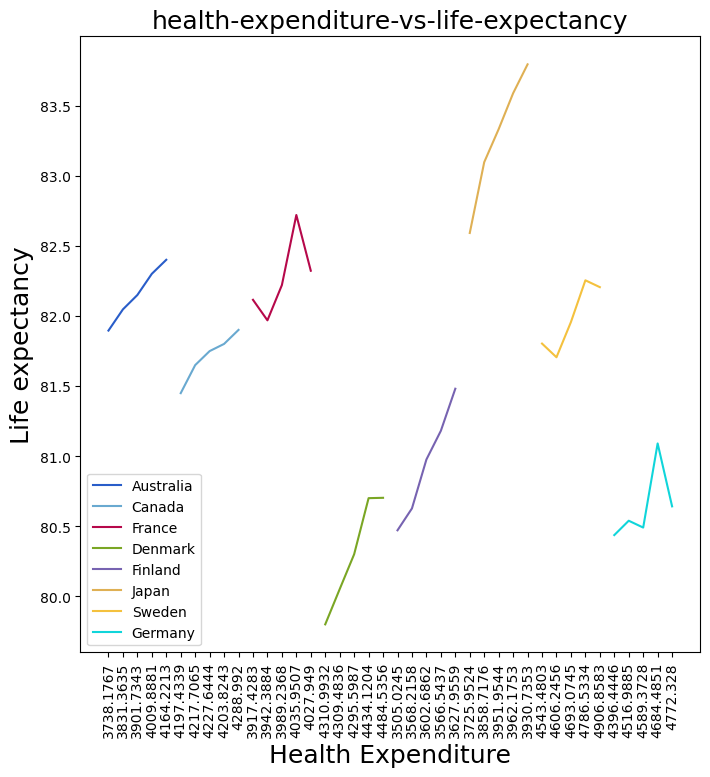

In [6]:
#code for Health expenditure versus Life-expectancy
import pandas as pnd
import matplotlib.pyplot as plt
#Reading csv file in to data frame
import seaborn as sns
import numpy as np
le_he_DF_Raw=pnd.read_csv("life-expectancy-vs-health-expenditure.csv")
#Data cleaning 
le_he_DF_clean = (le_he_DF_Raw[(le_he_DF_Raw['Year'] >= 2011) & (le_he_DF_Raw['Year'] <= 2020)]
                  .dropna(subset = ['Life expectancy at birth, total (years)', 'Health Expenditure and Financing (per capita) (OECDstat (2017))']))
Countries_list= ['Australia','Canada','France','Denmark','Finland','Japan','Sweden','Germany']
#plot size
plt.figure(figsize=(8,8))
for i in range(len(Countries_list)):
    df_Entity = le_he_DF_clean.loc[le_he_DF_clean['Entity'] == Countries_list[i]]
    df_Entity_le = df_Entity['Life expectancy at birth, total (years)']
    df_Entity_helExp = df_Entity['Health Expenditure and Financing (per capita) (OECDstat (2017))']
    #generating random clour for each entity
    clr = (np.random.random(), np.random.random(), np.random.random())
    #Instance of plot
    plt.plot(df_Entity_helExp,df_Entity_le, color = clr)
#Assigning plot with corresponding axis Labels and title
plt.xticks(rotation ='vertical')
plt.legend(Countries_list, loc = "lower left")
fs=18
plt.title('health-expenditure-vs-life-expectancy',fontsize = fs)
plt.xlabel('Health Expenditure',fontsize = fs)
plt.ylabel('Life expectancy',fontsize = fs)
plt.show()

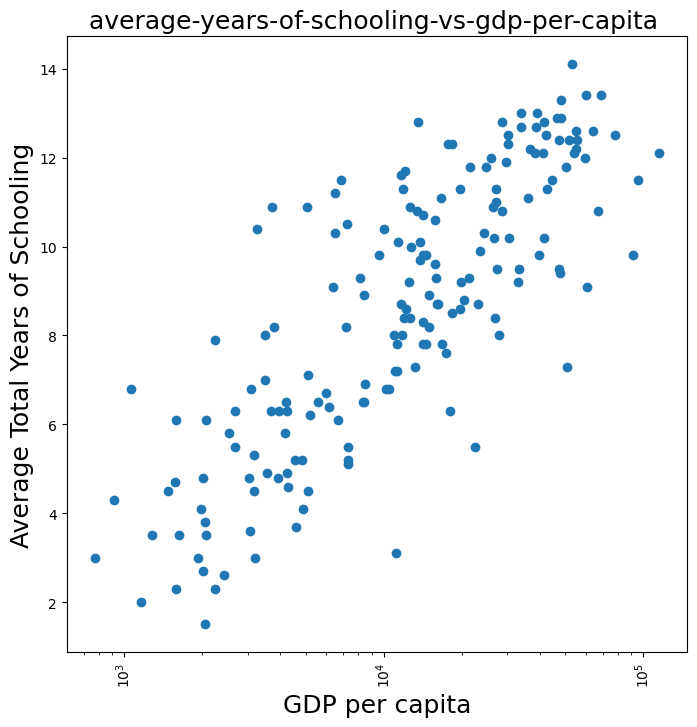

In [7]:
#code for Average years of schooling versus GDP per capita
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns
#Reading csv file in to data frame
ayos_gdp_DF_Raw=pnd.read_csv("average-years-of-schooling-vs-gdp-per-capita.csv")
#Data cleaning 
ayos_gdp_DF_clean = (ayos_gdp_DF_Raw[(ayos_gdp_DF_Raw['Year'] == 2017)]
                  .dropna(subset = ['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))', 'GDP per capita, PPP (constant 2017 international $)']))
#Plot size
plt.figure(figsize=(8,8))
#Scatter plot with corresponding axis Labels and title
plt.scatter(ayos_gdp_DF_clean['GDP per capita, PPP (constant 2017 international $)'], ayos_gdp_DF_clean['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'])
fs=18
plt.title("average-years-of-schooling-vs-gdp-per-capita ", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = 18)
plt.ylabel("Average Total Years of Schooling", fontsize = fs)
plt.xticks(rotation ='vertical')
plt.xscale('log')
plt.show()